In [1]:
import os
import sys
print(os.getcwd())

/home/ardalan/Documents/Work/repositories/personal_repos/customer_segmentation/notebooks


In [2]:
# add parent folder to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [3]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import joblib
from scripts.helpers import feature_importance

In [4]:
# load data
data = np.load("../data/processed/processed_data.npz", allow_pickle=True)
X = data["X_train"]
feature_names = data["feature_names"]

In [5]:
#load scalar
scaler = joblib.load("../data/processed/scaler.joblib")

In [6]:
X

array([[ 1.00000000e+00, -1.40459590e+00, -1.86353594e+00,
        -4.36680692e-01],
       [ 1.00000000e+00, -1.26432186e+00, -1.86353594e+00,
         1.21791183e+00],
       [ 0.00000000e+00, -1.33445888e+00, -1.81937743e+00,
        -1.73671767e+00],
       [ 0.00000000e+00, -1.12404782e+00, -1.81937743e+00,
         1.06033159e+00],
       [ 0.00000000e+00, -5.62951647e-01, -1.77521891e+00,
        -3.97285632e-01],
       [ 0.00000000e+00, -1.19418484e+00, -1.77521891e+00,
         1.02093653e+00],
       [ 0.00000000e+00, -2.82403562e-01, -1.73106040e+00,
        -1.73671767e+00],
       [ 0.00000000e+00, -1.12404782e+00, -1.73106040e+00,
         1.73004761e+00],
       [ 1.00000000e+00,  1.75157006e+00, -1.68690189e+00,
        -1.85490285e+00],
       [ 0.00000000e+00, -6.33088668e-01, -1.68690189e+00,
         8.63356288e-01],
       [ 1.00000000e+00,  1.96198112e+00, -1.68690189e+00,
        -1.42155719e+00],
       [ 0.00000000e+00, -2.82403562e-01, -1.68690189e+00,
      

In [7]:
X_reduced = X.copy()
X_reduced

array([[ 1.00000000e+00, -1.40459590e+00, -1.86353594e+00,
        -4.36680692e-01],
       [ 1.00000000e+00, -1.26432186e+00, -1.86353594e+00,
         1.21791183e+00],
       [ 0.00000000e+00, -1.33445888e+00, -1.81937743e+00,
        -1.73671767e+00],
       [ 0.00000000e+00, -1.12404782e+00, -1.81937743e+00,
         1.06033159e+00],
       [ 0.00000000e+00, -5.62951647e-01, -1.77521891e+00,
        -3.97285632e-01],
       [ 0.00000000e+00, -1.19418484e+00, -1.77521891e+00,
         1.02093653e+00],
       [ 0.00000000e+00, -2.82403562e-01, -1.73106040e+00,
        -1.73671767e+00],
       [ 0.00000000e+00, -1.12404782e+00, -1.73106040e+00,
         1.73004761e+00],
       [ 1.00000000e+00,  1.75157006e+00, -1.68690189e+00,
        -1.85490285e+00],
       [ 0.00000000e+00, -6.33088668e-01, -1.68690189e+00,
         8.63356288e-01],
       [ 1.00000000e+00,  1.96198112e+00, -1.68690189e+00,
        -1.42155719e+00],
       [ 0.00000000e+00, -2.82403562e-01, -1.68690189e+00,
      

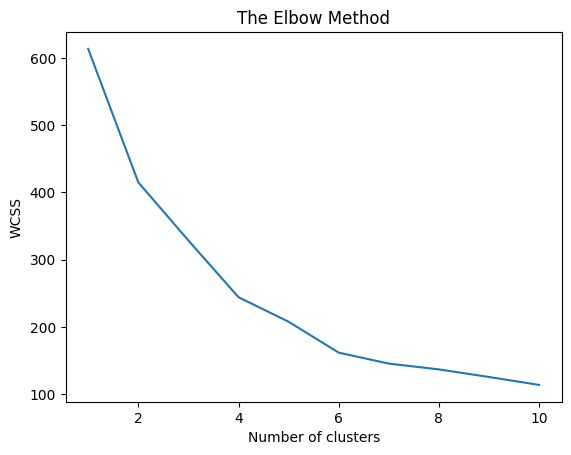

In [8]:
# using Elbow method to find the optimum number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [10]:
y_kmeans

array([4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4,
       2, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 4, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3], dtype=int32)

In [11]:
# 0.7 - 1.0	Very strong separation	Excellent
# 0.5 - 0.7	Clear separation	Good
# 0.25 - 0.5	Weak separation	Moderate
# 0.0 - 0.25	Overlapping clusters	Poor
# < 0.0	Misclassified samples	Very poor
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.342


In [12]:
X_df = pd.DataFrame(X, columns=feature_names)
X_df

,Sex,Age,Annual_Income,Spending_Score
0,1.0,-1.404596,-1.863536,-0.436681
1,1.0,-1.264322,-1.863536,1.217912
2,0.0,-1.334459,-1.819377,-1.736718
3,0.0,-1.124048,-1.819377,1.060332
4,0.0,-0.562952,-1.775219,-0.397286
...,...,...,...,...
184,0.0,0.138419,1.845779,-0.436681
185,1.0,-0.633089,1.845779,1.848233
186,0.0,1.050200,1.934096,-1.027607
187,1.0,-0.773363,1.934096,0.705776


In [13]:
importance = feature_importance(X_df, 5)
print(importance)

Spending_Score    0.046538
Annual_Income     0.040009
Sex              -0.071982
Age              -0.109447
dtype: float64


In [14]:
cols_to_inverse = ['Age','Annual_Income', 'Spending_Score']
X_df.loc[:, cols_to_inverse] = scaler.inverse_transform(X_df[cols_to_inverse])
X_df

,Sex,Age,Annual_Income,Spending_Score
0,1.0,19.0,15000.0,39.0
1,1.0,21.0,15000.0,81.0
2,0.0,20.0,16000.0,6.0
3,0.0,23.0,16000.0,77.0
4,0.0,31.0,17000.0,40.0
...,...,...,...,...
184,0.0,41.0,99000.0,39.0
185,1.0,30.0,99000.0,97.0
186,0.0,54.0,101000.0,24.0
187,1.0,28.0,101000.0,68.0


In [15]:
X_np = X_df.to_numpy()
X_np

array([[1.00e+00, 1.90e+01, 1.50e+04, 3.90e+01],
       [1.00e+00, 2.10e+01, 1.50e+04, 8.10e+01],
       [0.00e+00, 2.00e+01, 1.60e+04, 6.00e+00],
       [0.00e+00, 2.30e+01, 1.60e+04, 7.70e+01],
       [0.00e+00, 3.10e+01, 1.70e+04, 4.00e+01],
       [0.00e+00, 2.20e+01, 1.70e+04, 7.60e+01],
       [0.00e+00, 3.50e+01, 1.80e+04, 6.00e+00],
       [0.00e+00, 2.30e+01, 1.80e+04, 9.40e+01],
       [1.00e+00, 6.40e+01, 1.90e+04, 3.00e+00],
       [0.00e+00, 3.00e+01, 1.90e+04, 7.20e+01],
       [1.00e+00, 6.70e+01, 1.90e+04, 1.40e+01],
       [0.00e+00, 3.50e+01, 1.90e+04, 9.90e+01],
       [0.00e+00, 5.80e+01, 2.00e+04, 1.50e+01],
       [0.00e+00, 2.40e+01, 2.00e+04, 7.70e+01],
       [1.00e+00, 3.70e+01, 2.00e+04, 1.30e+01],
       [1.00e+00, 2.20e+01, 2.00e+04, 7.90e+01],
       [0.00e+00, 3.50e+01, 2.10e+04, 3.50e+01],
       [1.00e+00, 2.00e+01, 2.10e+04, 6.60e+01],
       [1.00e+00, 5.20e+01, 2.30e+04, 2.90e+01],
       [0.00e+00, 3.50e+01, 2.30e+04, 9.80e+01],
       [1.00e+00, 3.

In [16]:
kmeans.cluster_centers_


array([[ 0.42553191,  1.16510518, -0.1244422 , -0.04859744],
       [ 0.46153846, -0.64253019,  0.74436388,  0.80729409],
       [ 0.38095238,  0.45570509, -1.36517559, -1.20957425],
       [ 0.54545455,  0.10228737,  1.06430723, -1.23055084],
       [ 0.38888889, -0.95260177, -1.0919886 ,  0.73094511]])

In [17]:
centers_original = scaler.inverse_transform(kmeans.cluster_centers_[:,1:])
centers_original

array([[5.56382979e+01, 5.43829787e+04, 4.88510638e+01],
       [2.98653846e+01, 7.40576923e+04, 7.05769231e+01],
       [4.55238095e+01, 2.62857143e+04, 1.93809524e+01],
       [4.04848485e+01, 8.13030303e+04, 1.88484848e+01],
       [2.54444444e+01, 3.24722222e+04, 6.86388889e+01]])

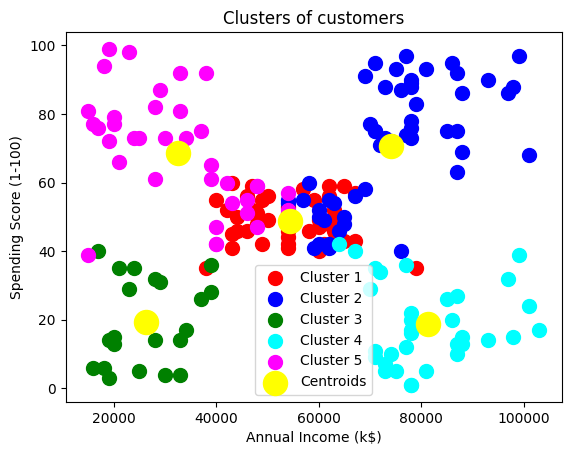

In [18]:
plt.scatter(X_np[y_kmeans == 0, 2], X_np[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_np[y_kmeans == 1, 2], X_np[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_np[y_kmeans == 2, 2], X_np[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_np[y_kmeans == 3, 2], X_np[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_np[y_kmeans == 4, 2], X_np[y_kmeans == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X_np[y_kmeans == 4, 2], X_np[y_kmeans == 4, 3], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(centers_original[:, 1], centers_original[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
# based on silhouette score we can drop features 'Age' and 'Sex' (X_reduced)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_reduced = kmeans.fit_predict(X_reduced[:,2:])
print(y_kmeans_reduced, y_kmeans_reduced.shape)

score = silhouette_score(X_reduced[:,2:], kmeans.labels_)
print(f"\nSilhouette Score: {score:.3f}")

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 4 2 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1] (189,)

Silhouette Score: 0.574


In [20]:
X_df_reduced = pd.DataFrame(X_reduced, columns=feature_names)
X_df_reduced

,Sex,Age,Annual_Income,Spending_Score
0,1.0,-1.404596,-1.863536,-0.436681
1,1.0,-1.264322,-1.863536,1.217912
2,0.0,-1.334459,-1.819377,-1.736718
3,0.0,-1.124048,-1.819377,1.060332
4,0.0,-0.562952,-1.775219,-0.397286
...,...,...,...,...
184,0.0,0.138419,1.845779,-0.436681
185,1.0,-0.633089,1.845779,1.848233
186,0.0,1.050200,1.934096,-1.027607
187,1.0,-0.773363,1.934096,0.705776


In [21]:
cols_to_inverse = ['Age','Annual_Income', 'Spending_Score']
X_df_reduced.loc[:, cols_to_inverse] = scaler.inverse_transform(X_df_reduced[cols_to_inverse])
X_df_reduced

,Sex,Age,Annual_Income,Spending_Score
0,1.0,19.0,15000.0,39.0
1,1.0,21.0,15000.0,81.0
2,0.0,20.0,16000.0,6.0
3,0.0,23.0,16000.0,77.0
4,0.0,31.0,17000.0,40.0
...,...,...,...,...
184,0.0,41.0,99000.0,39.0
185,1.0,30.0,99000.0,97.0
186,0.0,54.0,101000.0,24.0
187,1.0,28.0,101000.0,68.0


In [22]:
X_df_reduced = X_df_reduced.iloc[:,2:]

In [23]:
X_df_reduced

,Annual_Income,Spending_Score
0,15000.0,39.0
1,15000.0,81.0
2,16000.0,6.0
3,16000.0,77.0
4,17000.0,40.0
...,...,...
184,99000.0,39.0
185,99000.0,97.0
186,101000.0,24.0
187,101000.0,68.0


In [24]:
X_np_reduced = X_df_reduced.to_numpy()
print(X_np_reduced, X_df_reduced.shape)

[[1.50e+04 3.90e+01]
 [1.50e+04 8.10e+01]
 [1.60e+04 6.00e+00]
 [1.60e+04 7.70e+01]
 [1.70e+04 4.00e+01]
 [1.70e+04 7.60e+01]
 [1.80e+04 6.00e+00]
 [1.80e+04 9.40e+01]
 [1.90e+04 3.00e+00]
 [1.90e+04 7.20e+01]
 [1.90e+04 1.40e+01]
 [1.90e+04 9.90e+01]
 [2.00e+04 1.50e+01]
 [2.00e+04 7.70e+01]
 [2.00e+04 1.30e+01]
 [2.00e+04 7.90e+01]
 [2.10e+04 3.50e+01]
 [2.10e+04 6.60e+01]
 [2.30e+04 2.90e+01]
 [2.30e+04 9.80e+01]
 [2.40e+04 3.50e+01]
 [2.40e+04 7.30e+01]
 [2.50e+04 5.00e+00]
 [2.50e+04 7.30e+01]
 [2.80e+04 1.40e+01]
 [2.80e+04 8.20e+01]
 [2.80e+04 3.20e+01]
 [2.80e+04 6.10e+01]
 [2.90e+04 3.10e+01]
 [2.90e+04 8.70e+01]
 [3.00e+04 4.00e+00]
 [3.00e+04 7.30e+01]
 [3.30e+04 4.00e+00]
 [3.30e+04 9.20e+01]
 [3.30e+04 1.40e+01]
 [3.30e+04 8.10e+01]
 [3.40e+04 1.70e+01]
 [3.40e+04 7.30e+01]
 [3.70e+04 2.60e+01]
 [3.70e+04 7.50e+01]
 [3.80e+04 3.50e+01]
 [3.80e+04 9.20e+01]
 [3.90e+04 3.60e+01]
 [3.90e+04 6.10e+01]
 [3.90e+04 2.80e+01]
 [3.90e+04 6.50e+01]
 [4.00e+04 5.50e+01]
 [4.00e+04 4.

In [25]:
print(kmeans.cluster_centers_)
new_col = np.array([1, 1, 1, 1, 1]).reshape(-1,1)
centers = kmeans.cluster_centers_
centers = np.hstack((new_col, centers))

centers_original = scaler.inverse_transform(centers)
print(centers_original)

[[-1.38983554  1.15344718]
 [ 1.09642251 -1.23890737]
 [-1.36435276 -1.14921743]
 [ 1.05092586  1.27640752]
 [-0.1141795  -0.0023249 ]]
[[5.32842604e+01 2.57272727e+04 7.93636364e+01]
 [5.32842604e+01 8.20303030e+04 1.86363636e+01]
 [5.32842604e+01 2.63043478e+04 2.09130435e+01]
 [5.32842604e+01 8.10000000e+04 8.24848485e+01]
 [5.32842604e+01 5.46153846e+04 5.00256410e+01]]


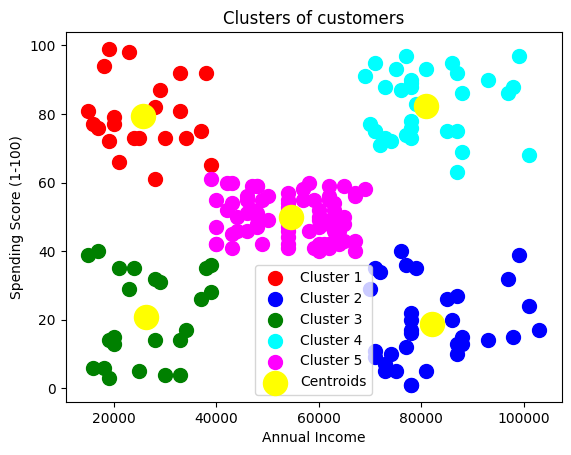

In [26]:
plt.scatter(X_np_reduced[y_kmeans_reduced == 0, 0], X_np_reduced[y_kmeans_reduced == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_np_reduced[y_kmeans_reduced == 1, 0], X_np_reduced[y_kmeans_reduced == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_np_reduced[y_kmeans_reduced == 2, 0], X_np_reduced[y_kmeans_reduced == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_np_reduced[y_kmeans_reduced == 3, 0], X_np_reduced[y_kmeans_reduced == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_np_reduced[y_kmeans_reduced == 4, 0], X_np_reduced[y_kmeans_reduced == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(centers_original[:, 1], centers_original[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [27]:
np.hstack((X_df_reduced, y_kmeans_reduced.reshape(-1,1)))

array([[1.50e+04, 3.90e+01, 2.00e+00],
       [1.50e+04, 8.10e+01, 0.00e+00],
       [1.60e+04, 6.00e+00, 2.00e+00],
       [1.60e+04, 7.70e+01, 0.00e+00],
       [1.70e+04, 4.00e+01, 2.00e+00],
       [1.70e+04, 7.60e+01, 0.00e+00],
       [1.80e+04, 6.00e+00, 2.00e+00],
       [1.80e+04, 9.40e+01, 0.00e+00],
       [1.90e+04, 3.00e+00, 2.00e+00],
       [1.90e+04, 7.20e+01, 0.00e+00],
       [1.90e+04, 1.40e+01, 2.00e+00],
       [1.90e+04, 9.90e+01, 0.00e+00],
       [2.00e+04, 1.50e+01, 2.00e+00],
       [2.00e+04, 7.70e+01, 0.00e+00],
       [2.00e+04, 1.30e+01, 2.00e+00],
       [2.00e+04, 7.90e+01, 0.00e+00],
       [2.10e+04, 3.50e+01, 2.00e+00],
       [2.10e+04, 6.60e+01, 0.00e+00],
       [2.30e+04, 2.90e+01, 2.00e+00],
       [2.30e+04, 9.80e+01, 0.00e+00],
       [2.40e+04, 3.50e+01, 2.00e+00],
       [2.40e+04, 7.30e+01, 0.00e+00],
       [2.50e+04, 5.00e+00, 2.00e+00],
       [2.50e+04, 7.30e+01, 0.00e+00],
       [2.80e+04, 1.40e+01, 2.00e+00],
       [2.80e+04, 8.20e+0

In [ ]:
original_df = pd.read_csv("../data/raw/Mall_Customers.csv")
original_df['clusters'] = kmeans.labels_
print(original_df.columns)
print(original_df.groupby('clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())
print(original_df.groupby(['clusters', 'Genre']).size().unstack(fill_value=0))

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'clusters'],
      dtype='object')
                Age  Annual Income (k$)  Spending Score (1-100)
clusters                                                       
0         25.272727           25.727273               79.363636
1         40.727273           82.030303               18.636364
2         45.217391           26.304348               20.913043
3         32.484848           81.000000               82.484848
4         43.128205           54.615385               50.025641
Genre     Female  Male
clusters              
0             13     9
1             15    18
2             14     9
3             17    16
4             46    32


In [ ]:
original_df.to_csv('../data/predict_customer_cluster.csv', index=False)